In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [3]:
df = pd.read_csv('AIML Dataset.csv')

DATA INSPECTION

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [8]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [9]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [11]:
df.isnull().sum().sum()

np.int64(0)

In [12]:
df.shape

(6362620, 11)

In [17]:
round((df["isFraud"].value_counts()[1] / df.shape[0])*100,2)

np.float64(0.13)

EXPLORATORY DATA ANALYSIS

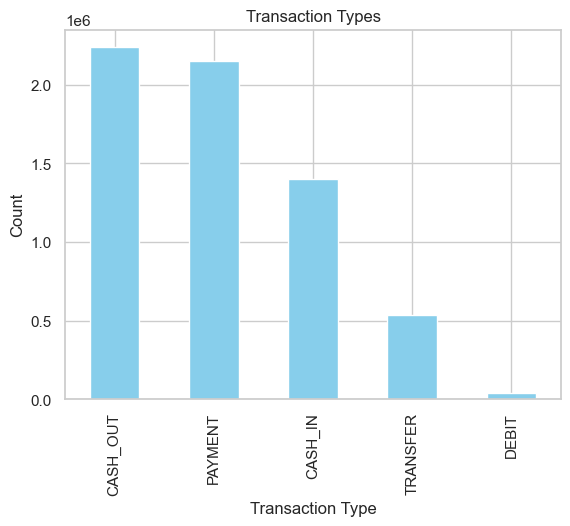

In [19]:
df["type"].value_counts().plot(kind='bar',title="Transaction Types",color='skyblue')
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

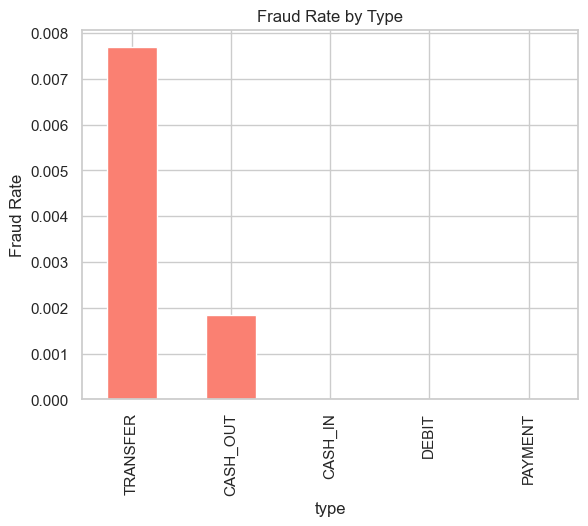

In [21]:
fraud_by_type = df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind='bar', title="Fraud Rate by Type", color='salmon')
plt.ylabel("Fraud Rate")
plt.show()

In [23]:
df["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

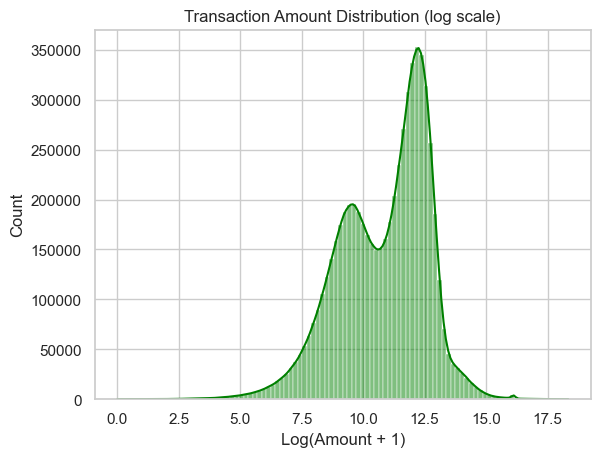

In [27]:
sns.histplot(np.log1p(df["amount"]), bins=100, kde=True, color='green')
plt.title("Transaction Amount Distribution (log scale)")
plt.xlabel("Log(Amount + 1)")
plt.show()

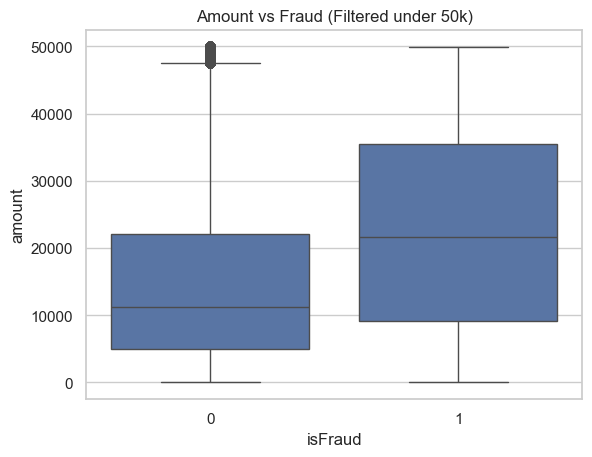

In [30]:
sns.boxplot(data=df[df["amount"]<50000],x="isFraud",y="amount")
plt.title("Amount vs Fraud (Filtered under 50k)")
plt.show()

In [31]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [32]:
df["balanceDiffOrig"]= df["oldbalanceOrg"] - df["newbalanceOrig"]
df["balanceDiffDest"]= df["newbalanceDest"] - df["oldbalanceDest"]

In [34]:
(df["balanceDiffOrig"]<0).sum()

np.int64(1399253)

In [35]:
(df["balanceDiffDest"]<0).sum()

np.int64(1238864)

In [36]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0


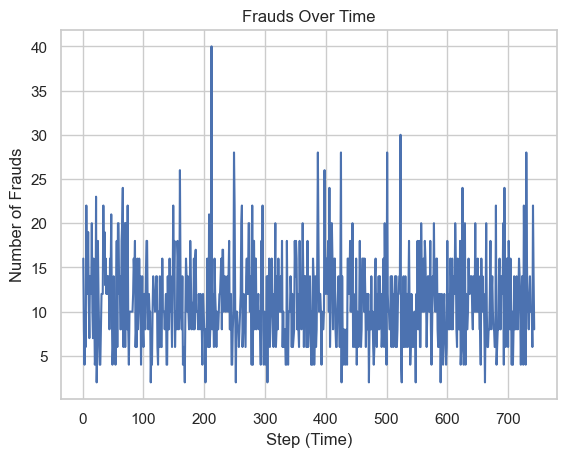

In [37]:
frauds_per_step = df[df["isFraud"]==1]["step"].value_counts().sort_index()
plt.plot(frauds_per_step.index, frauds_per_step.values, label= "Frauds per step")
plt.xlabel("Step (Time)")
plt.ylabel("Number of Frauds")
plt.title("Frauds Over Time")
plt.grid(True)
plt.show()

In [38]:
df.drop(columns="step",inplace=True)


In [39]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [41]:
top_senders = df["nameOrig"].value_counts().head(10)

In [42]:
top_senders

nameOrig
C1677795071    3
C1999539787    3
C724452879     3
C1976208114    3
C400299098     3
C1784010646    3
C1530544995    3
C1065307291    3
C545315117     3
C1902386530    3
Name: count, dtype: int64

In [43]:
top_receivers = df["nameDest"].value_counts().head(10)

In [44]:
top_receivers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C1789550256     99
C451111351      99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [45]:
fraud_users = df[df["isFraud"]==1]["nameOrig"].value_counts().head(10)

In [46]:
fraud_users

nameOrig
C1280323807    1
C1305486145    1
C840083671     1
C1420196421    1
C2101527076    1
C1039979813    1
C2089752665    1
C1614818636    1
C40604503      1
C1970706589    1
Name: count, dtype: int64

In [47]:
fraud_types = df[df["type"].isin(["TRANSFER","CASH_OUT"])]

In [48]:
fraud_types["type"].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

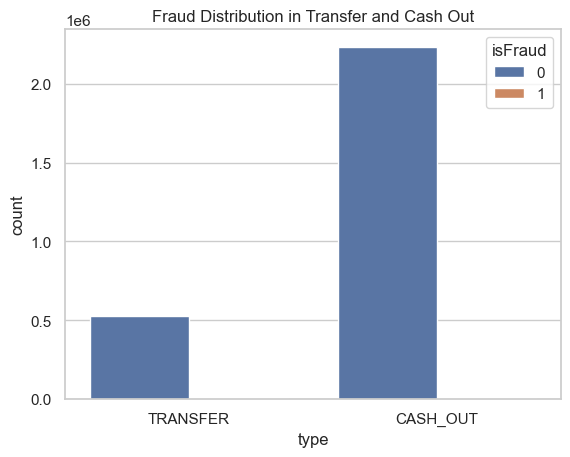

In [49]:
sns.countplot(data=fraud_types, x="type", hue="isFraud")
plt.title("Fraud Distribution in Transfer and Cash Out")
plt.show()

In [50]:
corr = df[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","balanceDiffOrig","balanceDiffDest","isFraud"]].corr()

In [51]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,balanceDiffOrig,balanceDiffDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.102337,0.845964,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,-0.220297,-0.087032,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.267750,-0.094456,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.047460,0.232316,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,-0.006451,0.436191,0.000535
balanceDiffOrig,0.102337,-0.220297,-0.267750,-0.047460,-0.006451,1.000000,0.169292,0.362472
balanceDiffDest,0.845964,-0.087032,-0.094456,0.232316,0.436191,0.169292,1.000000,0.027028
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,0.362472,0.027028,1.000000


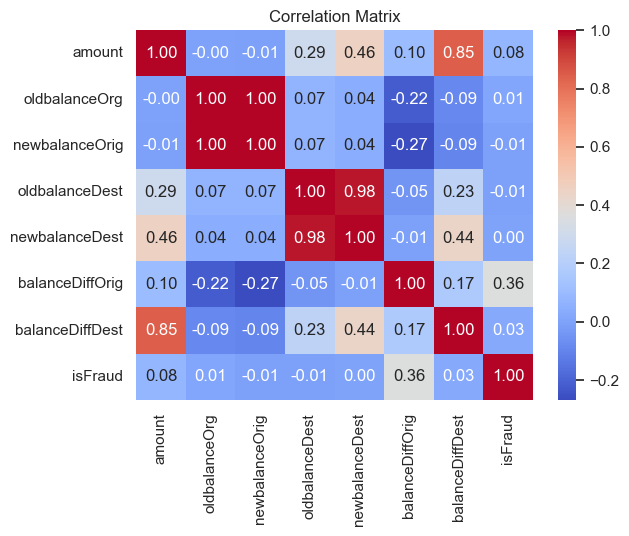

In [54]:
sns.heatmap(corr,annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [55]:
zero_after_transfer = df[
  (df["oldbalanceOrg"]>0) &
  (df["newbalanceOrig"]==0) &
  (df["type"].isin(["TRANSFER","CASH_OUT"]))
]

In [56]:
len(zero_after_transfer)

1188074

In [57]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89


FEATURE ENGINEERING & SELECTION

In [58]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [62]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [64]:
df_model = df.drop(["nameOrig","nameDest","isFlaggedFraud"],axis =1)

In [65]:
categorical = ["type"]
numeric = ["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]

In [66]:
y = df_model["isFraud"]
X = df_model.drop("isFraud",axis=1)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,stratify=y)

In [69]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric),
        ('cat', OneHotEncoder(drop="first"), categorical)
    ],
    remainder="drop"
    )

In [71]:
pipeline = Pipeline([
    ('prep', preprocessor),
    ('clf', LogisticRegression(class_weight='balanced',max_iter=1000))
    ])

In [73]:
pipeline.fit(X_train,y_train)

,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [74]:
y_pred = pipeline.predict(X_test)

In [76]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97   1906322
           1       0.02      0.95      0.04      2464

    accuracy                           0.94   1908786
   macro avg       0.51      0.95      0.51   1908786
weighted avg       1.00      0.94      0.97   1908786



In [77]:
confusion_matrix(y_test,y_pred)

array([[1798381,  107941],
       [    117,    2347]])

In [79]:
pipeline.score(X_test,y_test) * 100

94.33891489145458

In [81]:
import joblib

joblib.dump(pipeline,"fraud_detection_pipeline.pkl")

['fraud_detection_pipeline.pkl']